# Introduction of Scikit-Learn 

## This notebook domonstrates some of the most useful functions of the beautiful sklearn library
### Steps 
* 1.An end-to-end Scikit-learn workflow
* 2.Getting the data ready
* 3.Choose the right estimator/algotithm for our problems
* 4.Fit the model/algorithm and use it to make predictions on our data,
* 5.Evaluation of model
* 6.Improve the model
* 7.Save and load a train model
* 8.Putting it all together!

## 0.An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
#X is (feature matrix, feature variable)
X  = heart_disease.drop('target', axis=1)

# create Y which is labels
y = heart_disease['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [3]:
# 2. Choose the right models and hyperparamter
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
# Make the Prediction
y_preds = clf.predict(X_test)
y_preds


array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [7]:
y_test

35     1
29     1
124    1
23     1
250    0
      ..
300    0
222    0
204    0
159    1
275    0
Name: target, Length: 61, dtype: int64

In [8]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.819672131147541

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [11]:
confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 4, 28]])

In [12]:
 accuracy_score(y_test, y_preds)

0.819672131147541

In [13]:
# 5. Improve the model
# Try different amount of n-estimators

predictionHighvalue = 0
np.random.seed(42)
for i in range(10, 100, 5):
    print(f'Tring model with {i} estimator...')
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print(f"Model accuracy on test set: {accuracy* 100:.2f}%")
    print("")
    if(predictionHighvalue < accuracy):
        predictionHighvalue = accuracy
        n_estinators = i
print(predictionHighvalue, n_estinators)

Tring model with 10 estimator...
Model accuracy on test set: 80.33%

Tring model with 15 estimator...
Model accuracy on test set: 85.25%

Tring model with 20 estimator...
Model accuracy on test set: 81.97%

Tring model with 25 estimator...
Model accuracy on test set: 83.61%

Tring model with 30 estimator...
Model accuracy on test set: 81.97%

Tring model with 35 estimator...
Model accuracy on test set: 86.89%

Tring model with 40 estimator...
Model accuracy on test set: 81.97%

Tring model with 45 estimator...
Model accuracy on test set: 85.25%

Tring model with 50 estimator...
Model accuracy on test set: 81.97%

Tring model with 55 estimator...
Model accuracy on test set: 80.33%

Tring model with 60 estimator...
Model accuracy on test set: 85.25%

Tring model with 65 estimator...
Model accuracy on test set: 80.33%

Tring model with 70 estimator...
Model accuracy on test set: 86.89%

Tring model with 75 estimator...
Model accuracy on test set: 81.97%

Tring model with 80 estimator...
M

In [14]:
# 6. Save the model and load it 
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [15]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.8360655737704918

In [16]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


## Using k-neighbour 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
accuracyMax = 0
for i in range(1, 100, 2):
    print(f"Trying with n_neighbors = {i}...")
    n_neighbors = i
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy {accuracy} with n_neighbors= {i}")
    print("")
    if (accuracyMax < accuracy):
        accuracyMax = accuracy
        n_neighbors = i
print(f"Maximum accuracy = {accuracyMax} with n_neighbour = {n_neighbors}")

Trying with n_neighbors = 1...
Accuracy 0.6229508196721312 with n_neighbors= 1

Trying with n_neighbors = 3...
Accuracy 0.6721311475409836 with n_neighbors= 3

Trying with n_neighbors = 5...
Accuracy 0.639344262295082 with n_neighbors= 5

Trying with n_neighbors = 7...
Accuracy 0.6721311475409836 with n_neighbors= 7

Trying with n_neighbors = 9...
Accuracy 0.6721311475409836 with n_neighbors= 9

Trying with n_neighbors = 11...
Accuracy 0.639344262295082 with n_neighbors= 11

Trying with n_neighbors = 13...
Accuracy 0.7049180327868853 with n_neighbors= 13

Trying with n_neighbors = 15...
Accuracy 0.7049180327868853 with n_neighbors= 15

Trying with n_neighbors = 17...
Accuracy 0.5901639344262295 with n_neighbors= 17

Trying with n_neighbors = 19...
Accuracy 0.5901639344262295 with n_neighbors= 19

Trying with n_neighbors = 21...
Accuracy 0.6065573770491803 with n_neighbors= 21

Trying with n_neighbors = 23...
Accuracy 0.639344262295082 with n_neighbors= 23

Trying with n_neighbors = 25.

In [19]:
cols = heart_disease.index
cols

RangeIndex(start=0, stop=303, step=1)

In [20]:
len(cols)

303

In [21]:
# # Visulizing the data
# # Create of the oo methods
# %matplotlib inline
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(10, 8))


# # summing all the feature values 
# sum_value = 0
# for i in heart_disease.columns:
#     sum_value = sum_value + heart_disease[i].sum()


In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
heart_disease.loc[1]

age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64

In [24]:
len(heart_disease.index)

303

In [25]:
row = np.empty(len(heart_disease))  # Created an empty array of len of the heart_disease
len(row)


303

In [26]:
heart_disease = pd.read_csv('heart-disease.csv')

In [27]:
# Visulizing tha dat 
%matplotlib inline
import matplotlib.pyplot as plt

if ('Sum of feature' in heart_disease.columns): # Checking the 'Sum of feature' on the list of column
   sumFeature = True
else :
    for i in range(0, len(heart_disease.index)): # Looping the upto the len of heart_disease
        row[i] = heart_disease.loc[i].mean()  # Adding into the empty array
        heart_disease["Sum of feature"] = row # Created an new column with sum of feature
        sumFeature = True # Indicates adition of 'Sum of feature'


In [28]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sum of feature
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,42.878571
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,40.966667
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,36.960000
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,39.920000
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,46.773333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,37.813333
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,37.413333
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,37.226667
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,29.480000


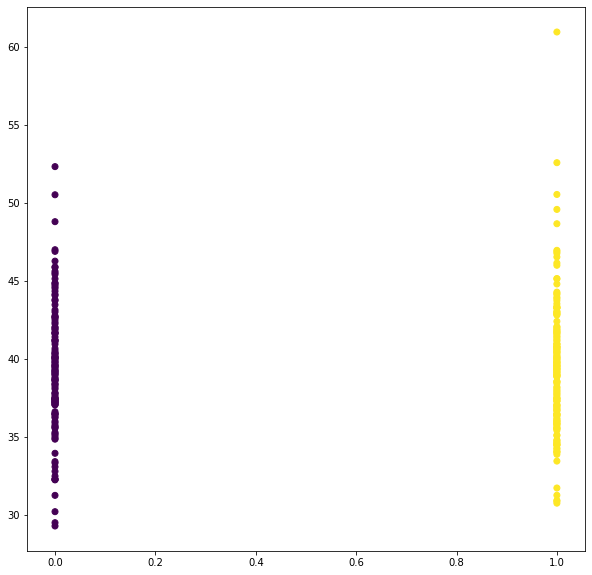

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(heart_disease['target'],heart_disease['Sum of feature'], c =  heart_disease['target'])

In [30]:
## Another method of doing sum of the rows is
heart_disease['sum'] = heart_disease.sum(axis=1)

In [31]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sum of feature,sum
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,42.878571,643.178571
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,40.966667,655.466667
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,36.960000,591.360000
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,39.920000,638.720000
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,46.773333,748.373333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,37.813333,605.013333
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,37.413333,598.613333
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,37.226667,595.626667
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,29.480000,471.680000


In [32]:
# Ignoring the warning
import warnings
warnings.filterwarnings('default')

In [33]:
import numpy as np 
import matplotlib.pyplot as plt




## 1. Getting our data ready to be used with machine learning

Three main things  we have to do:
    1. Split the data into feature and labels (usually 'X', and 'Y')
    2. Filling (also called imputing) or disregarding missing values 
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [34]:
heart_disease = pd.read_csv('heart-disease.csv')
X  = heart_disease.drop('target', axis=1)
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [35]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [36]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numericals

In [38]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [39]:
len(car_sales)

1000

In [40]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [41]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales['Price']

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)


In [42]:
# Built machine learnig model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'BMW'

In [43]:
# Trun the category into nummbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [44]:
transformed_X.shape, y.shape

((1000, 13), (1000,))

In [45]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [46]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])

In [47]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [48]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there is missing values
1. Fill them with some value (aka imputation)
2. Remove the samples with missing data altogether

In [50]:
# Import car sales missing data
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [51]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
# create Xand y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [53]:
# Let's try and convert our data into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")
transfomed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [54]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [55]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

### Options 1: Fill missing data with pandas

In [56]:
# Fill the "Make"columns
car_sales_missing['Make'].fillna("missing", inplace=True)

# Fill the " Colour", columns
car_sales_missing["Colour"].fillna('missing', inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the "Doors" columns
car_sales_missing['Doors'].fillna(4, inplace=True)

In [57]:
# Check out dataframe again
car_sales_missing.isna().sum()


Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [58]:
# Remove rows woth missing label vales (Price)
car_sales_missing.dropna(inplace=True)

In [59]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [60]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [61]:
# Let's try and convert our data into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")
transfomed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [62]:
transformed_X.shape

(1000, 13)

In [63]:
y.shape

(950,)

### Options2: Fill missing value using sklearn

In [64]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [65]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [66]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [67]:
#  Split into X and y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [68]:
# Fill missing values using sklearn (filling missing values is also called imputer)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill catogorical values with 'missing' and numberical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_feature = ['Make', 'Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# create an imputer (something that fills missing data)
imputer = ColumnTransformer([('cat_imputer', cat_imputer, cat_feature),
                            ('doorimputer', door_imputer, door_feature),
                            ('num_imputer', num_imputer, num_feature)])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [69]:
car_sales_filled = pd.DataFrame(filled_X, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

In [70]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [71]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [72]:
# Let's try and convert our data into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [73]:
type(transformed_X)

scipy.sparse.csr.csr_matrix

In [74]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
y = car_sales_missing['Price']
y.shape
transformed_X.shape

(950, 15)

In [75]:

# Now we've got our data as number's and filled (no missing values) 
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators= 100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## 2. Chossing the right estimator and algorithmn
Sklearn uses estimator as another term for machine learning mmodel or algorithm
* Classification - prediction wheather a sample is one thing or another 
* Regression - prediction a number

Step 1 = Cheak the sklearn machine learnig map ... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking the machine learning for a regression problem

In [76]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

/home/samanshrestha/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [77]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [78]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [79]:
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [80]:
# HOw many samples ?
len(boston_df)

506

In [81]:
# Let's try ridge regression
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X= boston_df.drop('target', axis=1)
y = boston_df['target']

# Splot into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168519

* How do we imporve this score?

* What if Ridge wasn't working?

Let's go back to map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [82]:
# Let's try random forest
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X= boston_df.drop('target', axis=1)
y = boston_df['target']

# Splot into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instatiate Random Forest Regresssor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the RAndom Forest Regressor
rf.score(X_test, y_test)

0.873969014117403

In [83]:
model.score(X_test, y_test), rf.score(X_test, y_test)

(0.6662221670168519, 0.873969014117403)

In [84]:
for i in range(0, 20):
    predictedValue = rf.predict(X_train)
    print(f"Predicted value: {int(predictedValue[i])} and acutal value: {boston_df['target'][i]}")

Predicted value: 12 and acutal value: 24.0
Predicted value: 20 and acutal value: 21.6
Predicted value: 19 and acutal value: 34.7
Predicted value: 13 and acutal value: 33.4
Predicted value: 18 and acutal value: 36.2
Predicted value: 24 and acutal value: 28.7
Predicted value: 20 and acutal value: 22.9
Predicted value: 23 and acutal value: 27.1
Predicted value: 8 and acutal value: 16.5
Predicted value: 23 and acutal value: 18.9
Predicted value: 21 and acutal value: 15.0
Predicted value: 32 and acutal value: 18.9
Predicted value: 31 and acutal value: 21.7
Predicted value: 12 and acutal value: 20.4
Predicted value: 41 and acutal value: 18.2
Predicted value: 14 and acutal value: 19.9
Predicted value: 21 and acutal value: 23.1
Predicted value: 23 and acutal value: 17.5
Predicted value: 18 and acutal value: 20.2
Predicted value: 24 and acutal value: 18.2


# 2.2 Choosing and estimator for a classification problems
Let's go to map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [85]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it say's to try `LinearSVC`

In [86]:
# Import LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data 
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter = 10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

/home/samanshrestha/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8688524590163934

In [87]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [88]:
heart_disease['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [89]:
prediction = clf.predict(X_test)

In [90]:
for i in range(0, 30):
    print(f"Predicted value: {prediction[i]} and actual value: {heart_disease['target'][i]}")

Predicted value: 0 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and ac

In [91]:
# Using the randomforestclassfier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(43)

# Make the data 
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Evaluation
rf.score(X_test, y_test)

0.8852459016393442

In [92]:
prediction = rf.predict(X_test)

In [93]:
for i in range(0, 30):
    print(f"Predicted value: {prediction[i]} and actual value: {heart_disease['target'][i]}")

Predicted value: 0 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 0 and actual value: 1
Predicted value: 1 and actual value: 1
Predicted value: 1 and ac

Tidbit:
    * 1. If you have structured data , used ensemble methods 
    * 2. If you have unstructured data, use deep learning and transfer learning

## 3. Fit the model and algorithm on our data and use it to make prediction

* X = features, features variables , data
* y = labels, targets , targets variable

In [94]:
# Using the randomforestclassfier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(43)

# Make the data 
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

# Fit the data (training the machine learning model)
rf.fit(X_train, y_train)

# Evaluation
rf.score(X_test, y_test)

0.8852459016393442

### 3.2 Make prediction using machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [95]:
# Use a trained model to make preditions
clf.predict(X_test)

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [96]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.7704918032786885

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.7704918032786885

Make predictions with `predict_proba()`

In [98]:
# predict_proba() returns probabilitest of a classification label


In [99]:
rf.predict_proba(X_test[:5])

array([[0.8 , 0.2 ],
       [0.21, 0.79],
       [0.61, 0.39],
       [0.23, 0.77],
       [0.06, 0.94]])

In [100]:
# Let's predict() on the same data..
rf.predict(X_test[:5])

array([0, 1, 0, 1, 1])

 `predict()` can also be used for regression models.

In [101]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [102]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

y_preds = model.predict(X_test)

In [103]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [104]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [105]:
 # Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

2.1226372549019623

## 4. Evaluating the machine learning models

Three ways to evaluate Sklearn model/estimators
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric function.

### 4.1 Evaluating the matric with `score` method

In [106]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

clf= RandomForestClassifier().fit(X_train, y_train)

In [107]:
clf.score(X_test, y_test)

0.8524590163934426

In [108]:
clf.score(X_train, y_train)

1.0

In [109]:
# Let's do the same for regressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

y_preds = model.predict(X_test)

In [110]:
model.score(X_test, y_test)

0.873969014117403

### 4.2 Evaluating the model using scoring parameter

In [111]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

clf= RandomForestClassifier().fit(X_train, y_train)

In [112]:
clf.score(X_test, y_test)

0.8524590163934426

In [113]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [114]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross validation score

clf_cross_val_score = np.mean(cross_val_score(clf, X, y , cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [115]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X_train, y_train)

1.0

In [116]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y , cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics 
1. Accuracy 
2. Area unde ROC curve
3. Confusion matric
4. Classification report


In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [118]:
print(f" Hear Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}% ")

 Hear Disease Classifier Cross-Validated Accuracy: 82.48% 


## Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve 

ROC curves are a comparision of a model's true positive rate (tpr) verus a models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False neative = model predicts 0 when truth is 1

In [133]:
# create X_test .. etc
X_train, X_test, y_train, y_test = train_test_split(X, y test_size=0.2)

SyntaxError: invalid syntax (<ipython-input-133-1a536ace7d21>, line 2)

In [134]:
from sklearn.metrics import roc_curve 

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.87, 0.13],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.14, 0.86],
       [0.4 , 0.6 ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.43, 0.57]])

In [135]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57])

In [136]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Cheak the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
       0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
       1.        ])

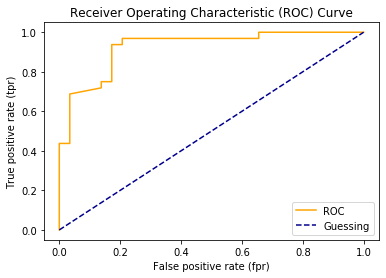

In [137]:
# Create a function for ploting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """ 
    Plots a ROC curve  give the false positive rate 9fpr) and true 
    positive rate(tpr) of a model.
    """
    # Plot roc curve 
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with ni predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    
    # Custinize the plot 
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [138]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9251077586206896

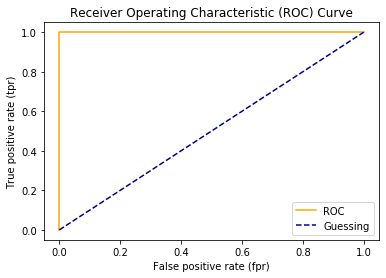

In [139]:
# Plot perfect ROC  curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [140]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

* Confusion matric

A confusion matrix is a quick way to compare the labels a model predicts and acutal labels it was supposed to predict.

In essence , giving you an idea of where the model is getting confused

In [141]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [142]:
# Visulization of confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['Acutal Labels'], colnames=['Predicted Labels|'])

Predicted Labels|,0,1
Acutal Labels,,
0,24,5
1,4,28


How to install conda package from jupyter notbook into the current environment

import sys 


!conda install --yes --prefix {sys.prefix} seaborn

/home/samanshrestha/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


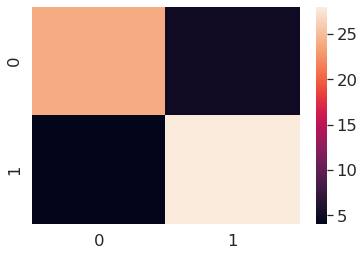

In [143]:
# Make our confusion matrix more visual with Searborn's heatmap()

import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

In [144]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot=True, # Annatate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

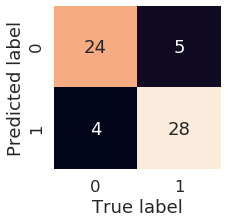

In [145]:
plot_conf_mat(conf_mat)

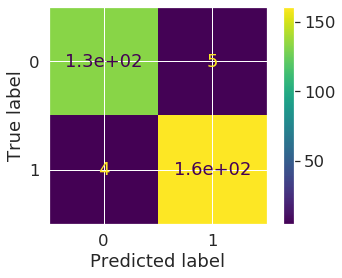

In [146]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)

**Cassification Report

In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### 4.2.2 Regression model evaluation metrix

https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 cofficient of determination
2. Mean absolute error(MAE)
3. Mean squared error(MSE

**R^2**

What R_squared does: Compares your models predictions to the mean fo the targets. Values can range from negative infinity (a very poor mmodel) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predits a range of numbers it's R^2 value would be 1.

In [152]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_ = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [303, 506]

In [161]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [162]:
y_test_mean

array([0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016])